<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Example-1" data-toc-modified-id="Example-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Example 1</a></span><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Fitting" data-toc-modified-id="Fitting-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Fitting</a></span></li><li><span><a href="#Weights" data-toc-modified-id="Weights-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Weights</a></span></li></ul></li><li><span><a href="#Example-2" data-toc-modified-id="Example-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Example 2</a></span><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Fitting" data-toc-modified-id="Fitting-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Fitting</a></span></li><li><span><a href="#Weights" data-toc-modified-id="Weights-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Weights</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from spkit.data import dataGen as ds
from spkit.ml import LR

# Example 1

## Data

In [20]:
np.random.seed(1)
dtype = ['MOONS','GAUSSIANS','LINEAR','SINUSOIDAL','SPIRAL']

X, y,_ = ds.create_dataset(200, dtype[3],0.05,varargin = 'PRESET')
#Normalizing
means = np.mean(X,0)
stds  = np.std(X,0)
X = (X-means)/stds
#In cureent version LR takes X and y as shape (nf,n) and (n,1)
X = X.T
y = y[None,:]
print(X.shape, y.shape)

(2, 200) (1, 200)


## Fitting

In [6]:
%matplotlib notebook

C:\Users\nbajaj\Desktop\cDrive_Space\Nik\SpKit\spkit\ml\LogisticRegression.py:8: UserWarning: Note: In current version, shape of X is (nf, n) and shape of y is (n,1), where nf is number of features and n is number of samples. These will be changed to conventional shapes (e.g. (n,nf), (n,)) of matrixs, in the later version.
  warnings.warn("Note: In current version, shape of X is (nf, n) and shape of y is (n,1), where nf is number of features and n is number of samples. These will be changed to conventional shapes (e.g. (n,nf), (n,)) of matrixs, in the later version.")


<IPython.core.display.Javascript object>


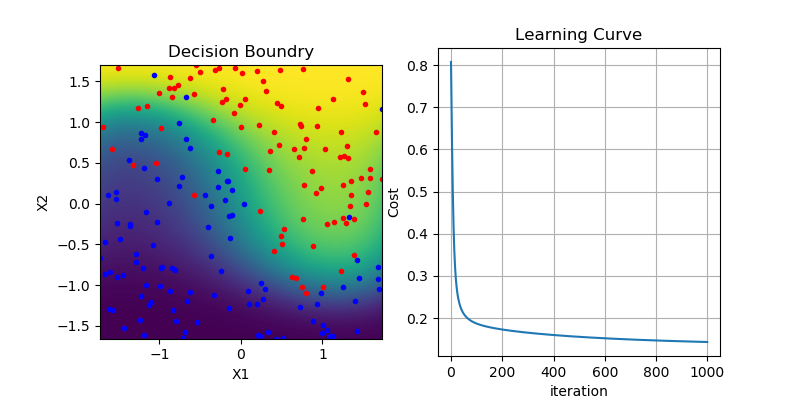

In [21]:
clf = LR(X,y,alpha=0.0003,polyfit=True,degree=3,lambd=2)

fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

for i in range(100):
    clf.fit(X,y,itr=10,verbose=False)
    ax1.cla()
    clf.Bplot(ax1,hardbound=False)
    ax2.cla()
    clf.LCurvePlot(ax2)
    fig.canvas.draw()
    #plt.pause(0.001)
plt.close(fig)

## Weights

In [22]:
W,b = clf.getWeights()
print('W: ',W)
print('b: ',b)

W:  [[ 1.91057763  0.84458349 -0.1489111  -0.24801809 -0.09287656 -0.39150547
   0.91555212]]
b:  [[0.11945438]]


# Example 2

## Data

In [15]:
dtype = ['MOONS','GAUSSIANS','LINEAR','SINUSOIDAL','SPIRAL']

X, y,_ = ds.create_dataset(200, dtype[4],0.01,varargin = 'PRESET')

#Normalizing
means = np.mean(X,0)
stds  = np.std(X,0)
X = (X-means)/stds

#In cureent version LR takes X and y as shape (nf,n) and (n,1)
X = X.T
y = y[None,:]

print(X.shape, y.shape)

(2, 200) (1, 200)


## Fitting

<IPython.core.display.Javascript object>


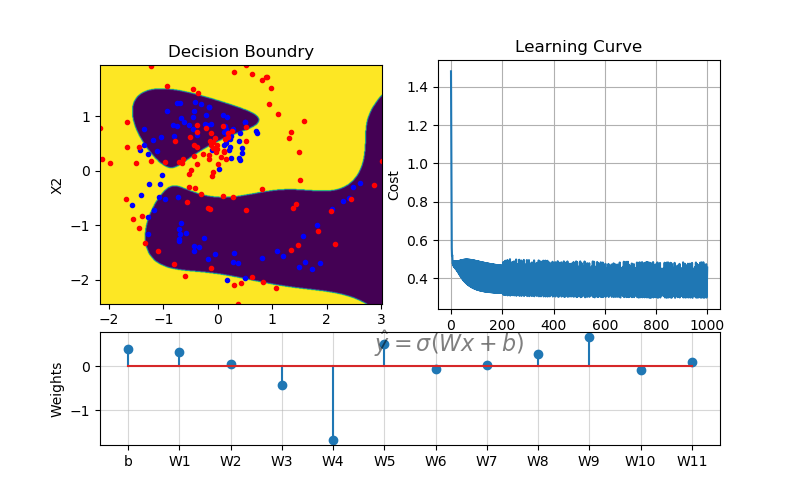

In [17]:
clf = LR(X,y,alpha=0.0003,polyfit=True,degree=5,lambd=1.5)

fig=plt.figure(figsize=(8,5))
gs=GridSpec(3,2)
ax1=fig.add_subplot(gs[0:2,0])
ax2=fig.add_subplot(gs[0:2,1])
ax3=fig.add_subplot(gs[2,:])

for i in range(100):
    clf.fit(X,y,itr=10,verbose=False)
    ax1.cla()
    clf.Bplot(ax1,hardbound=True)
    ax2.cla()
    clf.LCurvePlot(ax2)
    ax3.cla()
    clf.Wplot(ax3)
    fig.canvas.draw()
plt.close(fig)

## Weights

In [19]:
W,b = clf.getWeights()
print('W: ',W)
print('b: ',b)

W:  [[ 0.32796687  0.05558231 -0.43803186 -1.68270941  0.50804412 -0.06427375
   0.04127008  0.28750187  0.67305928 -0.08639061  0.1078304 ]]
b:  [[0.39305406]]
